### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

### Importing the necessary libraries

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Loading the data

In [2]:
df = pd.read_csv('data/coupons.csv')

### Data exploration

In [3]:
df.sample(10)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
10209,No Urgent Place,Alone,Rainy,55,10AM,Coffee House,1d,Female,31,Married partner,...,less1,gt8,4~8,less1,1,1,0,0,1,1
8800,Work,Alone,Snowy,30,7AM,Restaurant(20-50),1d,Male,26,Married partner,...,NaN,1~3,1~3,less1,1,1,1,0,1,0
12319,Home,Alone,Sunny,80,6PM,Restaurant(20-50),1d,Female,36,Married partner,...,never,1~3,less1,less1,1,0,0,1,0,0
424,Home,Alone,Sunny,80,6PM,Coffee House,2h,Male,50plus,Married partner,...,less1,less1,1~3,less1,1,0,0,0,1,0
8105,No Urgent Place,Alone,Sunny,80,10AM,Coffee House,1d,Female,41,Married partner,...,less1,less1,less1,less1,1,1,0,0,1,1
1990,No Urgent Place,Friend(s),Sunny,80,6PM,Restaurant(<20),2h,Male,21,Married partner,...,never,4~8,4~8,1~3,1,1,0,0,1,1
7705,Work,Alone,Snowy,30,7AM,Restaurant(20-50),1d,Male,50plus,Married partner,...,less1,less1,1~3,1~3,1,1,1,0,1,1
1050,Work,Alone,Sunny,55,7AM,Coffee House,2h,Male,50plus,Unmarried partner,...,never,1~3,gt8,never,1,1,1,0,1,0
7372,No Urgent Place,Alone,Sunny,55,6PM,Coffee House,2h,Male,below21,Unmarried partner,...,1~3,1~3,1~3,less1,1,0,0,0,1,1
4248,Home,Alone,Sunny,55,10PM,Carry out & Take away,1d,Male,21,Single,...,4~8,1~3,4~8,1~3,1,1,1,0,1,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

### Percentage of Nan per columns

In [5]:
df.isnull().sum()*100/len(df)

destination              0.000000
passanger                0.000000
weather                  0.000000
temperature              0.000000
time                     0.000000
coupon                   0.000000
expiration               0.000000
gender                   0.000000
age                      0.000000
maritalStatus            0.000000
has_children             0.000000
education                0.000000
occupation               0.000000
income                   0.000000
car                     99.148534
Bar                      0.843582
CoffeeHouse              1.710817
CarryAway                1.190476
RestaurantLessThan20     1.024913
Restaurant20To50         1.490066
toCoupon_GEQ5min         0.000000
toCoupon_GEQ15min        0.000000
toCoupon_GEQ25min        0.000000
direction_same           0.000000
direction_opp            0.000000
Y                        0.000000
dtype: float64

#### The column car has a 99% Nan rows
Let see what are other values of the column

In [6]:
print(df.car.unique())

[nan 'Scooter and motorcycle' 'crossover' 'Mazda5' 'do not drive'
 'Car that is too old to install Onstar :D']


The column car can be dropped

In [7]:
df.drop(columns=['car'], inplace=True)

What is in the other columns

In [8]:
for i in df.select_dtypes('object').columns:
    print(i, df[i].unique())

destination ['No Urgent Place' 'Home' 'Work']
passanger ['Alone' 'Friend(s)' 'Kid(s)' 'Partner']
weather ['Sunny' 'Rainy' 'Snowy']
time ['2PM' '10AM' '6PM' '7AM' '10PM']
coupon ['Restaurant(<20)' 'Coffee House' 'Carry out & Take away' 'Bar'
 'Restaurant(20-50)']
expiration ['1d' '2h']
gender ['Female' 'Male']
age ['21' '46' '26' '31' '41' '50plus' '36' 'below21']
maritalStatus ['Unmarried partner' 'Single' 'Married partner' 'Divorced' 'Widowed']
education ['Some college - no degree' 'Bachelors degree' 'Associates degree'
 'High School Graduate' 'Graduate degree (Masters or Doctorate)'
 'Some High School']
occupation ['Unemployed' 'Architecture & Engineering' 'Student'
 'Education&Training&Library' 'Healthcare Support'
 'Healthcare Practitioners & Technical' 'Sales & Related' 'Management'
 'Arts Design Entertainment Sports & Media' 'Computer & Mathematical'
 'Life Physical Social Science' 'Personal Care & Service'
 'Community & Social Services' 'Office & Administrative Support'
 'Constr

These are ordinal features that can be mapped: 

* **Restaurant20To50**: how many times do you go to a restaurant with average expense per person of \\$20 - \\$50 every month?
* **RestaurantLessThan20**: how many times do you go to a restaurant with an average expense per person of less than \\$20 every month?
* **CarryAway**: how many times do you get take-away food every month?
* **CoffeeHouse**: how many times do you go to a coffeehouse every month?
* **age**: quite self-explanatory
* **Bar**: how many times do you go to bar every month?
* **income**: income range

### Mapping

In [9]:
frequency_map = {
    'never': 0,
    'less1': 1,
    '1~3': 2,
    '4~8': 3,
    'gt8': 4
}
age_map = {
    'below21': 0,
    '21': 1,
    '26': 2,
    '31': 3,
    '36': 4,
    '41': 5,
    '46': 6,
    '50plus': 7
}
income_map = {
    'Less than $12500': 0,
    '$12500 - $24999': 1,
    '$25000 - $37499': 2,
    '$37500 - $49999': 3,
    '$50000 - $62499': 4,
    '$62500 - $74999': 5,
    '$75000 - $87499': 6,
    '$87500 - $99999': 7,
    '$100000 or More': 8
}

In [10]:
frequency_cols = ['Restaurant20To50', 'RestaurantLessThan20', 'CarryAway', 'CoffeeHouse', 'Bar']

In [11]:
for col in frequency_cols:
    df[col] = df[col].map(frequency_map)
df.age = df.age.map(age_map)
df.income = df.income.map(income_map)

### Data description

In [12]:
df.describe()

,temperature,age,has_children,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684.000000,12684.000000,12684.000000,12684.000000,12577.000000,12467.000000,12533.000000,12554.000000,12495.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,3.252996,0.414144,3.739593,1.037767,1.574637,2.421607,2.288115,1.272269,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,2.133950,0.492593,2.546622,1.095658,1.241215,0.931513,0.921126,0.885096,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,1.000000,0.000000,2.000000,0.000000,1.000000,2.000000,2.000000,1.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,3.000000,0.000000,3.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,5.000000,1.000000,6.000000,2.000000,2.000000,3.000000,3.000000,2.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,7.000000,1.000000,8.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


### toCoupon_GEQ5min has only one value
The column can be dropped

In [13]:
df.drop(columns=['toCoupon_GEQ5min'], inplace=True)

### The proportion of coupons accepted is:

In [14]:
df[df.Y == 1]['Y'].count()/len(df)

0.5684326710816777

### 0.58

What is the contain of the coupon column?

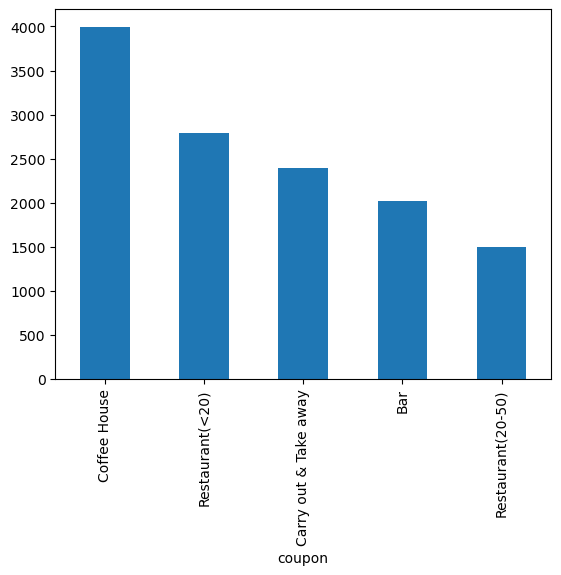

In [15]:
df.coupon.value_counts().plot(kind='bar')
plt.show()

How is the temperature distributed?

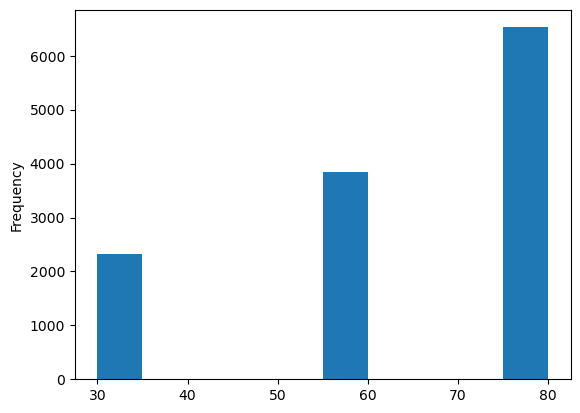

In [16]:
df.temperature.plot.hist()
plt.show()

Dataframe with only bar coupon

In [17]:
df_bar=df[(df.coupon == 'Bar')]

The proportion of bar coupons accepted is:

In [18]:
df[(df.coupon == 'Bar')&(df.Y == 1)]['Y'].count()/len(df[(df.coupon == 'Bar')])

0.41001487357461575

0.41

Acceptance rate of those who went to the bar 3 times or less

In [19]:
df[(df.coupon == 'Bar')&(df.Bar <= 2)&(df.Y == 1)]['Y']\
.count()/len(df[(df.coupon == 'Bar')&(df.Bar <= 2)])

0.37061769616026713

0.37

Acceptance rate of those who went to the bar more than 3 times a month

In [20]:
df[(df.coupon == 'Bar')&(df.Bar > 2)&(df.Y == 1)]['Y']\
.count()/len(df[(df.coupon == 'Bar')&(df.Bar > 2)])

0.7688442211055276

0.77

Acceptance rate of drivers who went to a bar more than once and are over 25 years of age

In [21]:
df[(df.coupon == 'Bar')&(df.Bar > 1)\
   &(df.age >= 2)&(df.Y == 1)]['Y']\
.count()/len(df[(df.coupon == 'Bar')&(df.Bar > 1)\
                &(df.age >= 2)])

0.6952380952380952

0.70

The acceptance rate for all others is:

In [22]:
df[(df.coupon == 'Bar')&(df.Bar <= 1)\
   &(df.age < 2)&(df.Y == 1)]['Y']\
.count()/len(df[(df.coupon == 'Bar')&(df.Bar <= 1)\
                &(df.age < 2)])

0.3944954128440367

Yes there is a difference, the acceptance crateria of the rest is 39% compare to 70%

Acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.

In [23]:
liste=df.occupation.unique().tolist()

In [24]:
df[(df.coupon == 'Bar')&(df.Bar > 1)\
   &(df.passanger.isin(['Alone', 'Friend(s)', 'Partner']))\
   &(df.occupation.isin(liste[:24]))&(df.Y == 1)]['Y']\
.count()/len(df[(df.coupon == 'Bar')&(df.Bar > 1)\
                &(df.passanger.isin(['Alone', 'Friend(s)', 'Partner']))&(df.occupation.isin(liste[:24]))])

0.7132486388384754

It is 71%

The acceptance rates of those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 

In [25]:
df[((df.coupon == 'Bar')&(df.Bar > 1)&(df.passanger.isin(['Alone', 'Friend(s)', 'Partner']))\
    &(df.maritalStatus.isin(['Unmarried partner', 'Single', 'Married partner', 'Divorced']))&(df.Y == 1))\
   |( (df.coupon == 'Bar')&(df.Bar > 1)&(df.age < 3)&(df.Y == 1) )\
   |( (df.coupon == 'Restaurant(<20)')&(df.RestaurantLessThan20 > 2)&(df.income < 4)&(df.Y == 1))]['Y']\
.count()/len(df[((df.coupon == 'Bar')&(df.Bar > 1)&(df.passanger.isin(['Alone', 'Friend(s)', 'Partner']))\
    &(df.maritalStatus.isin(['Unmarried partner', 'Single', 'Married partner', 'Divorced'])))\
   |( (df.coupon == 'Bar')&(df.Bar > 1)&(df.age < 3) )\
   |( (df.coupon == 'Restaurant(<20)')&(df.RestaurantLessThan20 > 2)&(df.income < 4))])

0.7126760563380282

It is 71%

My first observation is that, people who accept the bar coupon are those who go more than once a month to bars and who are over 25 years old.

Now let do the same for Restaurant 20-50, and we see that it doesn't follow the same trend as for bar coupon

In [26]:
df[(df.coupon == 'Restaurant(20-50)')&(df.Y == 1)]['Y'].count()/len(df[(df.coupon == 'Restaurant(20-50)')])

0.4410187667560322

In [27]:
df[(df.coupon == 'Restaurant(20-50)')&(df.Bar <= 2)&(df.Y == 1)]['Y']\
.count()/len(df[(df.coupon == 'Restaurant(20-50)')&(df.Bar <= 2)])

0.43617021276595747

In [28]:
df[(df.coupon == 'Restaurant(20-50)')&(df.Bar > 2)&(df.Y == 1)]['Y']\
.count()/len(df[(df.coupon == 'Restaurant(20-50)')&(df.Bar > 2)])

0.4759036144578313

In [29]:
df[(df.coupon == 'Restaurant(20-50)')&(df.Bar > 1)\
   &(df.age >= 2)&(df.Y == 1)]['Y']\
.count()/len(df[(df.coupon == 'Restaurant(20-50)')&(df.Bar > 1)\
                &(df.age >= 2)])

0.48606811145510836

In [30]:
df[(df.coupon == 'Restaurant(20-50)')&(df.Bar <= 1)\
   &(df.age < 2)&(df.Y == 1)]['Y']\
.count()/len(df[(df.coupon == 'Restaurant(20-50)')&(df.Bar <= 1)\
                &(df.age < 2)])

0.4291845493562232

Another attempt is done with Restaurant less than 20, the trend is same ass for Bar coupons.

In [31]:
df[(df.coupon == 'Restaurant(<20)')&(df.Y == 1)]['Y'].count()/len(df[(df.coupon == 'Restaurant(<20)')])

0.7071069633883704

In [32]:
df[(df.coupon == 'Restaurant(<20)')&(df.Bar <= 2)&(df.Y == 1)]['Y']\
.count()/len(df[(df.coupon == 'Restaurant(<20)')&(df.Bar <= 2)])

0.705641864268193

In [33]:
df[(df.coupon == 'Restaurant(<20)')&(df.Bar > 2)&(df.Y == 1)]['Y']\
.count()/len(df[(df.coupon == 'Restaurant(<20)')&(df.Bar > 2)])

0.722397476340694

In [34]:
df[(df.coupon == 'Restaurant(<20)')&(df.Bar > 1)\
   &(df.age >= 2)&(df.Y == 1)]['Y']\
.count()/len(df[(df.coupon == 'Restaurant(<20)')&(df.Bar > 1)\
                &(df.age >= 2)])

0.7194928684627575

In [35]:
df[(df.coupon == 'Restaurant(<20)')&(df.Bar <= 1)\
   &(df.age < 2)&(df.Y == 1)]['Y']\
.count()/len(df[(df.coupon == 'Restaurant(<20)')&(df.Bar <= 1)\
                &(df.age < 2)])

0.7367256637168141

#### Overall Bar and Restaurant less than 20 have a similar trend, if people go to bar or these retaurant more than once a month, the tend to accept the coupon.

#### Following are some extra plots for coupons, occupation and age acceptance rate

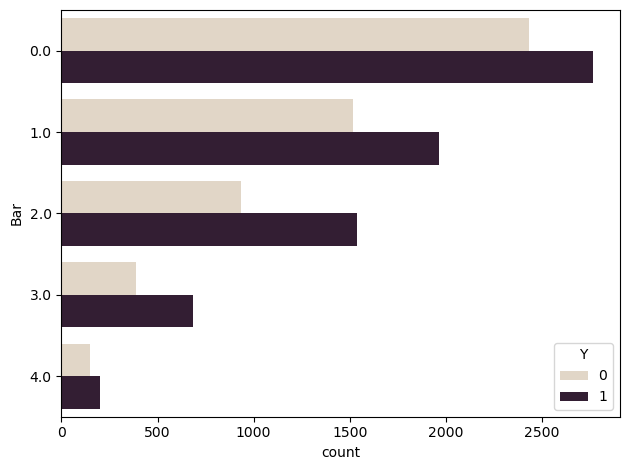

In [36]:
sns.countplot(y='Bar', hue='Y', data=df, 
                  palette="ch:.25", order=df['Bar'].value_counts().index);

plt.tight_layout()
plt.show()

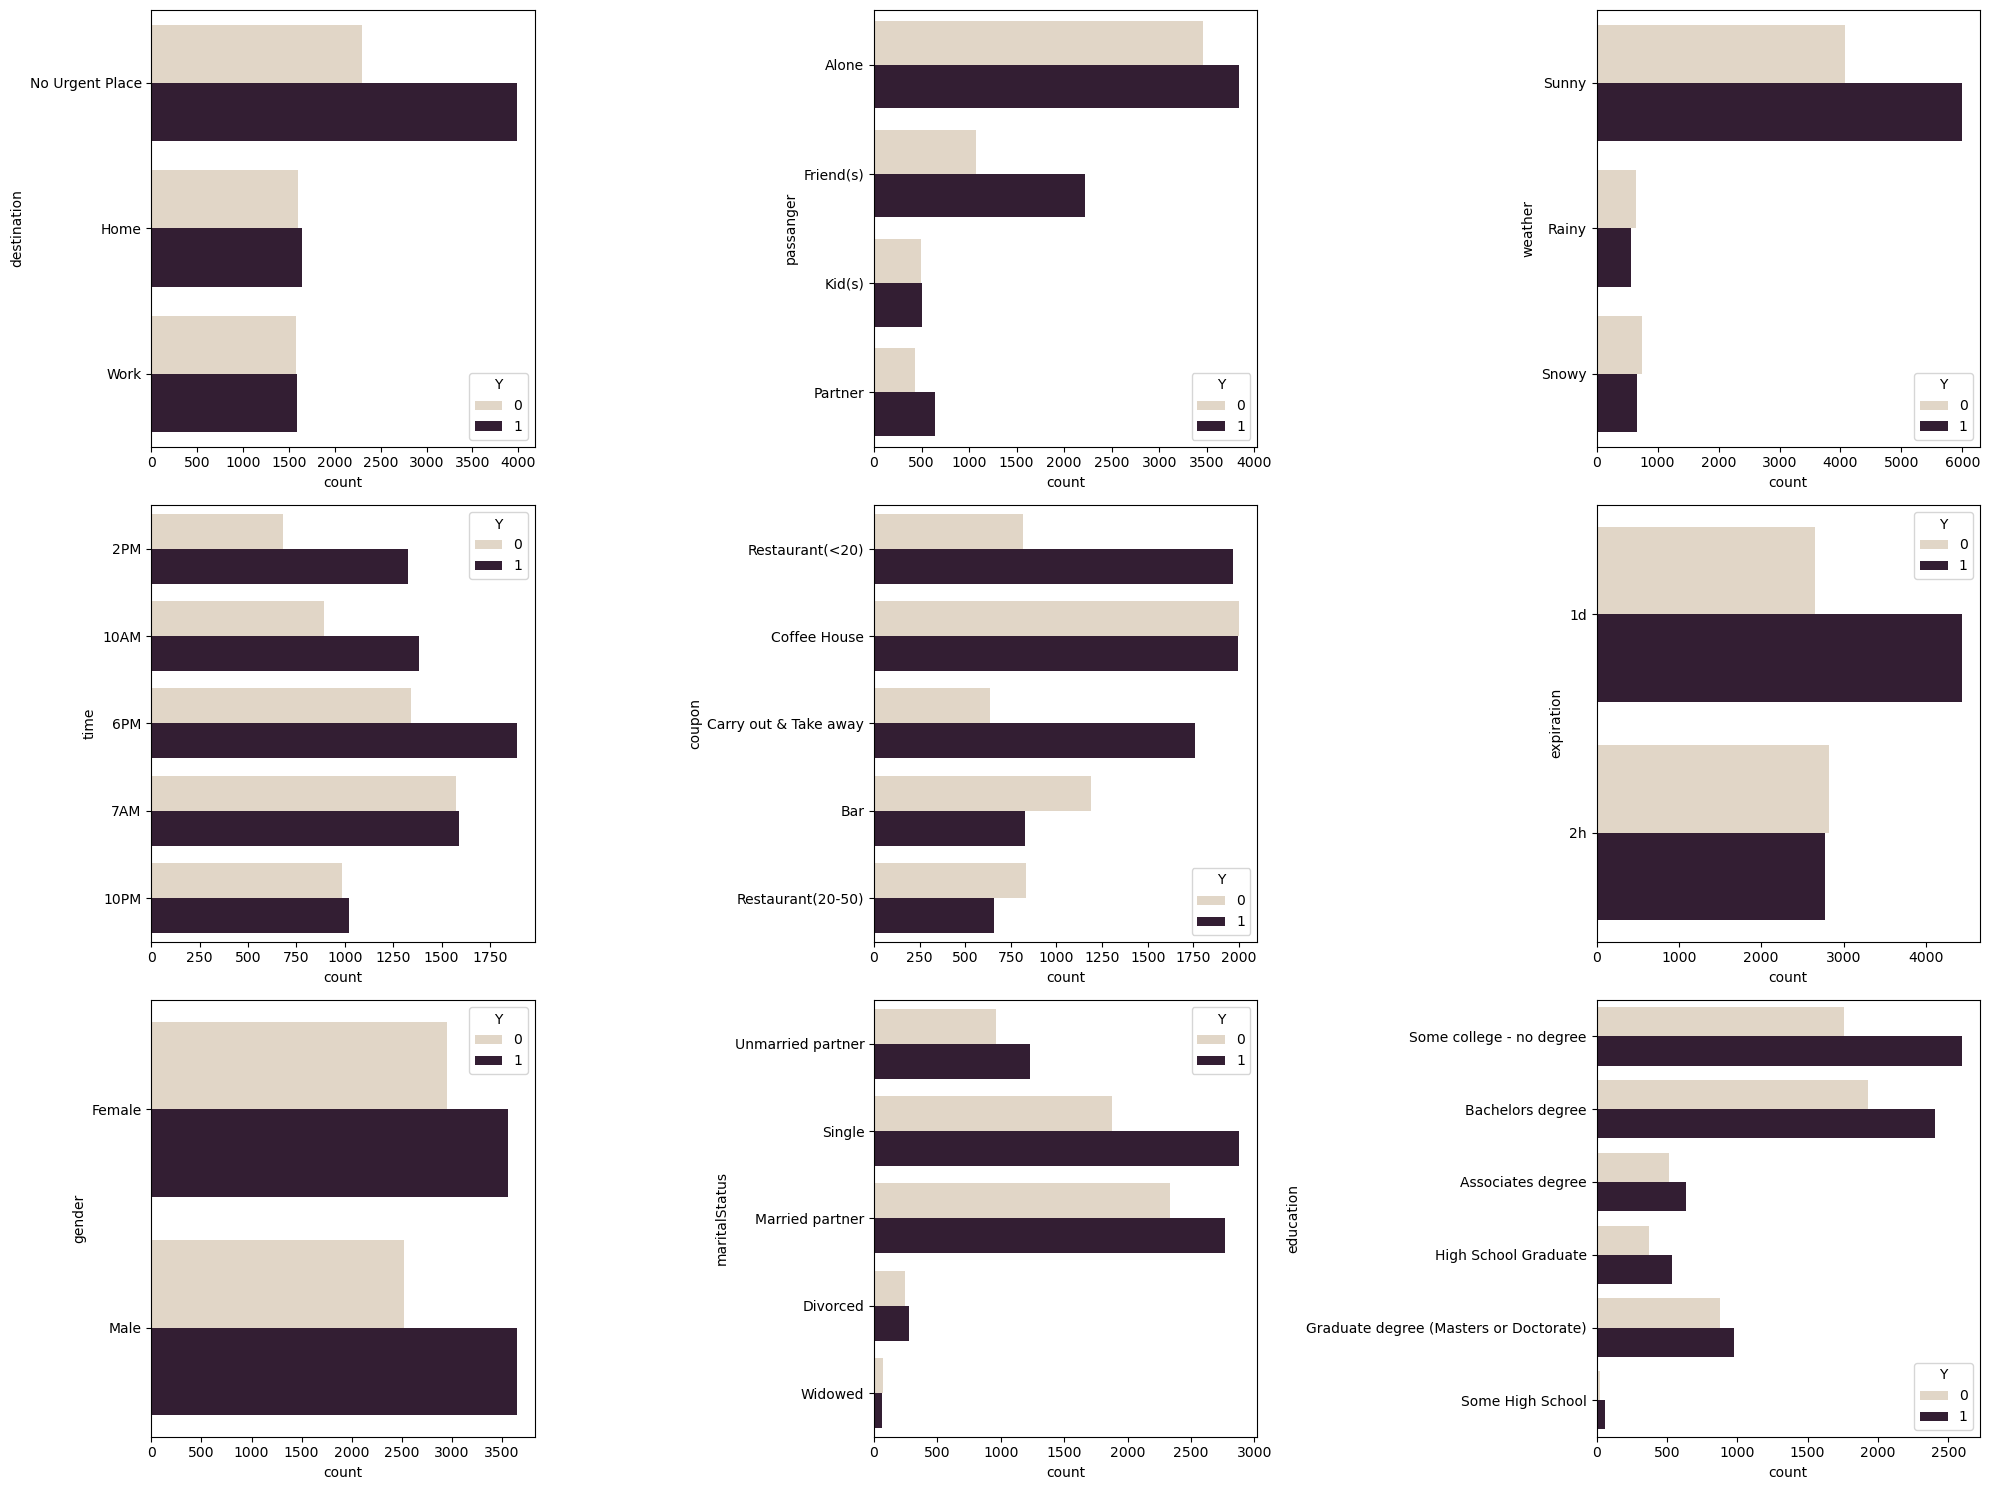

In [37]:
fig, axes = plt.subplots(3, 3, figsize=(20, 15))
axes = axes.flatten()

for ax, col in zip(axes, ['destination', 'passanger', 'weather', 'time', 
                          'coupon', 'expiration', 'gender', 'maritalStatus',
                          'education']):
    sns.countplot(y=col, hue='Y', data=df, ax=ax, palette='ch:.25')
plt.tight_layout()
plt.show()

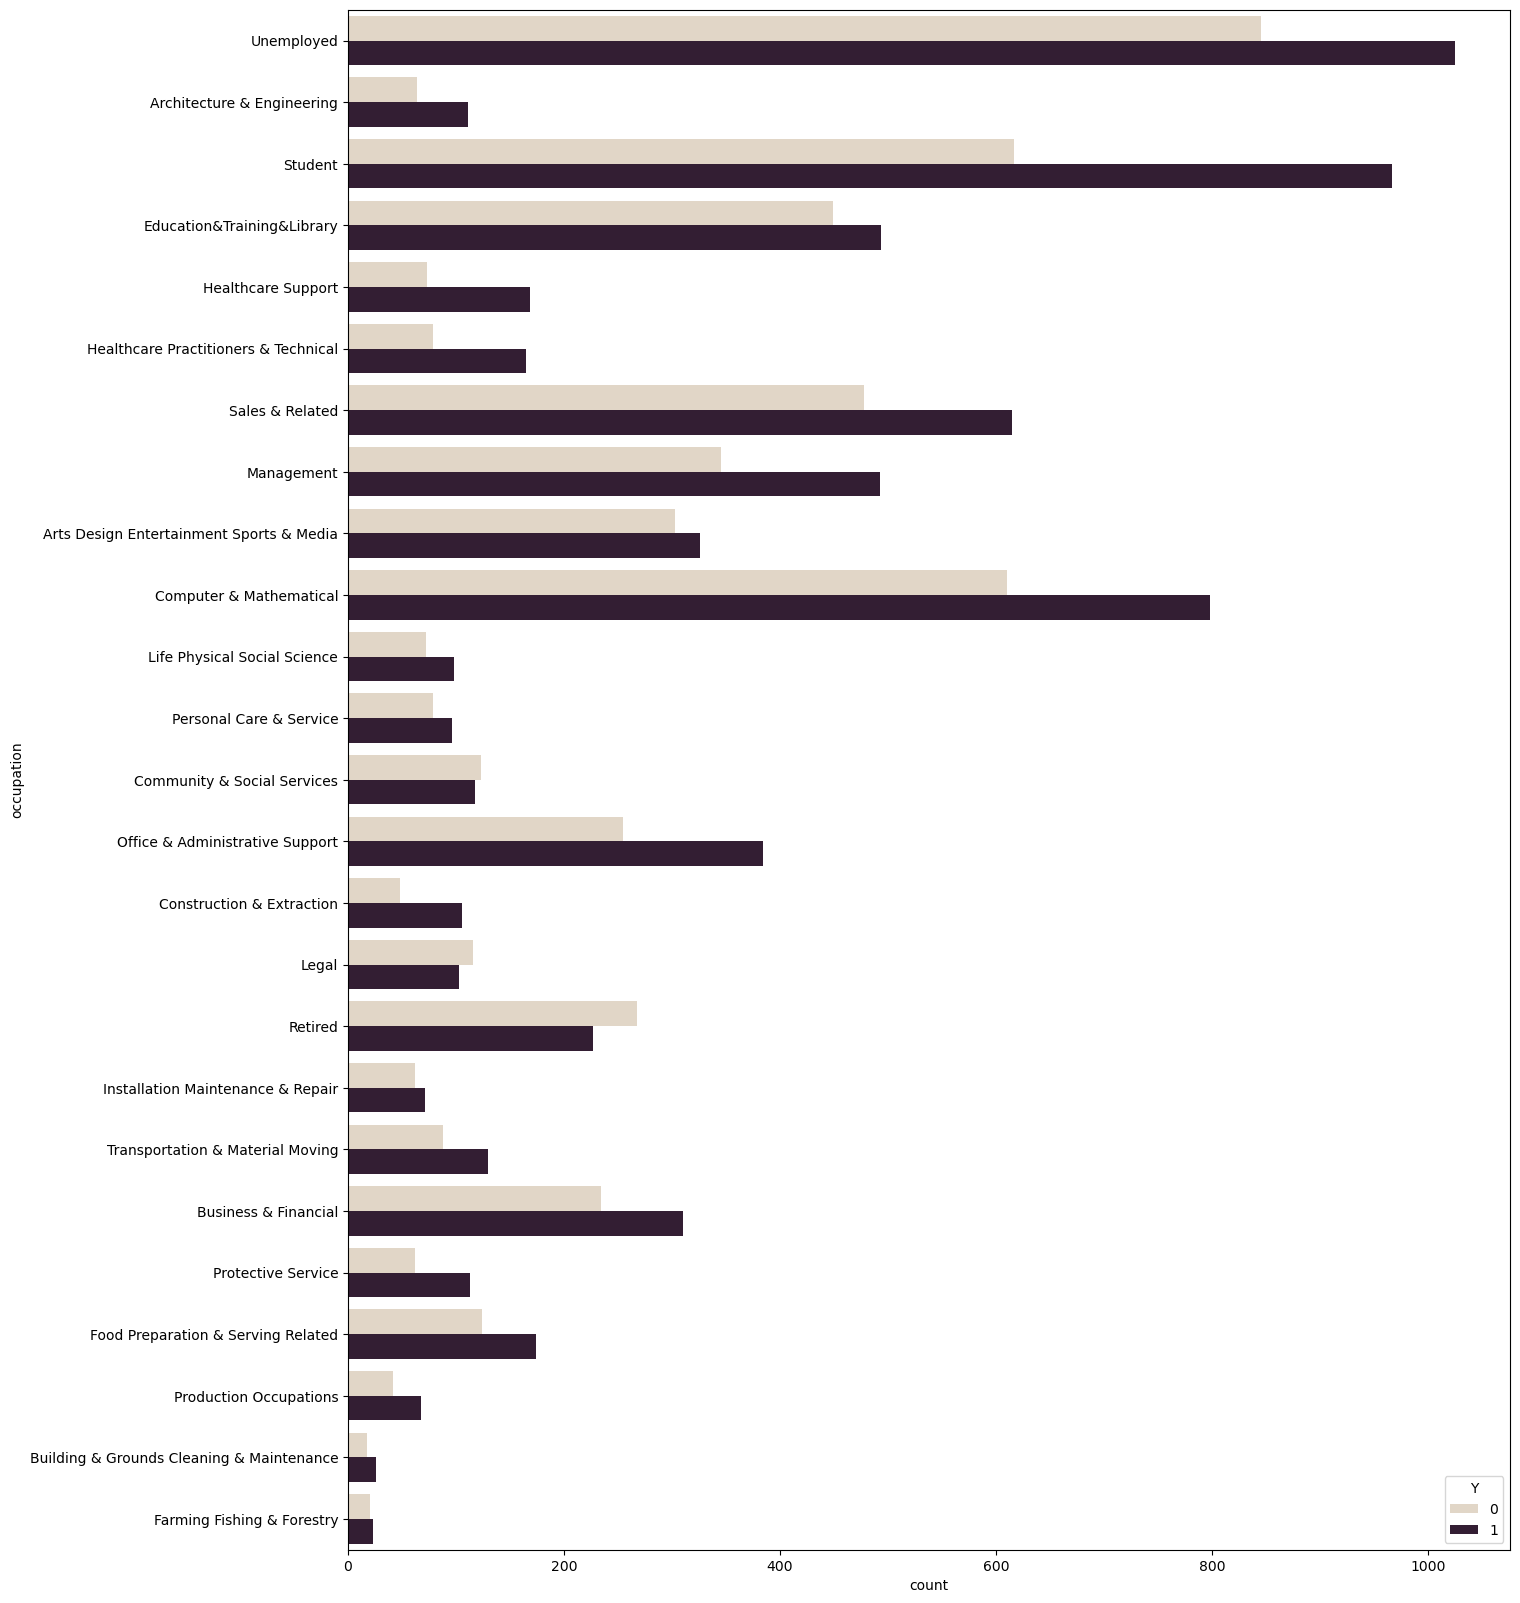

In [38]:
plt.subplots(figsize=(15, 20))
sns.countplot(y ='occupation', hue='Y', data=df, palette='ch:.25');
plt.show()